## Transfer Learning Using CNN



With transfer learning, instead of starting the learning process from scratch, you start from patterns that have been learned when solving a new related problem. So we reuse initial and middle layers of our pre-trained model to re-train only final layers for our new task. A pre-trained model denotes a model that was trained on a large benchmark dataset to solve a problem similar to the one that we want to solve.


Fine tuning is a way of appliying or utilizing transfer learning. Specifically fine tuning is a process that takes a model that's already been trained for a given task and then tuning or tweaking that model to make it perform a second similiar task. If the two tasks are different and there will be some information that the model has learned that may not apply to our new task or there may be new information that the model needs to learn from the data regarding the new task that wasn't learned from the previous task. 



### Assignment


In this assignment, you will implement a transfer learning approach by using clinical images for a binary image classification task. The dataset consists of skin cancer images which are labeled as melanomas, nevus, and seborrheic keratoses. You will show the ability of your CNN to distinguish between malignant melanoma and benign skin lesions (nevus, seborrheic keratosis).  So you will create a binary classification model for Melanoma vs Nevus and Seborrheic keratosis. You will use pre-trained models which are two different CNN architectures (VGG16 and ResNet50) available in Pytorch [1]. Follow the steps below  to complete the assignment.

[1]: https://pytorch.org/vision/stable/models.html

**Steps**:

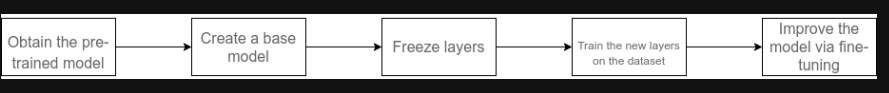


- Obtain the pre-trained model

The first step is to get the pre-trained model that is already given to you. You get pre-trained weights alongside each model. When you download a model, the weights are downloaded automatically. 

TorchVision offers pre-trained weights for every provided architecture, using the PyTorch *torch.hub* [2]. Instancing a pre-trained model will download its weights to a cache directory. This directory can be set using the TORCH_HOME environment variable. See *torch.hub.load_state_dict_from_url()*[3] for details.`

- Create a base model

The first step is to instantiate the base model using the architectures as VGG16 and ResNet50 separately. Download the pre-trained weights. If you don’t download the weights, you will have to use the architecture to train your model from scratch. Recall that the base model will usually have more units in the final output layer than you require. When creating the base model, you, therefore, have to remove the final output layer. Later on, you will add a final output layer that is compatible with your problem. 

- Freeze layers so they don’t change during training

Freezing the layers from the pre-trained model is important when using transfer learning or fine-tuning the model. This is because you don't want the weights in those layers to be significantly altered, as this may degrade the model's pre-existing knowledge. If the weights are changed too much, then the benefits of using a pre-trained model could be diminished, making it similar to training the model from scratch. However, it's worth noting that in some cases, fine-tuning might involve updating the weights of the pre-trained model, but with a smaller learning rate, so that the pre-existing knowledge is fine-tuned to the new task without being lost entirely. In such cases, the layers are not frozen but are still carefully updated to prevent losing the initial learning. 

- Add new trainable layers

The next step is to add new trainable layers that will turn old features into predictions on the new dataset. This is important because the pre-trained model is loaded without the final output layer. 

- Train the new layers on the dataset

Remember that the pre-trained model’s final output will most likely be different from the output that you want for your model.  You will add some new dense layers as you please, but most importantly, a final dense layer with units corresponding to the number of outputs expected by your model. 

- Improve the model via fine-tuning

Once you have done the previous step, you will have a model that can make predictions on your dataset. Now improve its performance through fine-tuning.

- Summarize history for accuracy

Plot a graph to demonstrate accuracy scores in train versus test sets. In your plot use x-axes for epoch and y a-axes for accuracy scores.


[2]: https://pytorch.org/docs/stable/hub.html#torch.hub.load_state_dict_from_url
[3]: https://pytorch.org/docs/stable/hub.html#module-torch.hub


## Submission

After training your models with the training and validation data, use the given test data for your predictions. In order to rank your results, you need to save your test results in a CSV file containing your test predictions like sample_predictions.csv and upload the test CSV file to the Kaggle competition. Furthermore, you are supposed to upload your coding in Jupyter notebook to the department's submission system.

Kaggle competition for VGG16 architecture: https://www.kaggle.com/t/7ee370dd307a47b8b182683a1e2f4a7f

Kaggle competition for ResNet50 architecture: https://www.kaggle.com/t/7f94629daea34740b9c21737e6b772a8

**Due Date**: 18.05.2023

**Note**: The late submission rules previously announced from the piazza apply.

### Your Work


In [1]:
#Include your codes below by including as many cells as necessary to clearly demonstrate your work
#Please write your codes in separate sections for data pre-processing, VGG16 and ResNet50 architectures etc.

In [2]:
from torchvision.datasets import ImageFolder
from torchvision.models import resnet50
import torch
import torch.nn as nn
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import csv
import os
import matplotlib.pyplot as plt


In [ ]:
# Define the paths to your train, validation, and test datasets
train_dir = r"C:\Users\salih\Desktop\assignment3\train"
valid_dir = r"C:\Users\salih\Desktop\assignment3\valid"
test_dir = r"C:\Users\salih\Desktop\assignment3\test"

In [ ]:
# Define the transformations to be applied to the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the images to a consistent size
    transforms.ToTensor(),  # Convert the images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image tensors
])


In [ ]:
# Load the train dataset
train_dataset = ImageFolder(train_dir, transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Load the validation dataset
valid_dataset = ImageFolder(valid_dir, transform=transform)
valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=False)


In [ ]:
# Define a custom loader function to load images without class subdirectories
def custom_loader(path):
    return Image.open(path).convert('RGB')

In [ ]:
class TestDataset(Dataset):
    def __init__(self, root, transform=None, loader=None):
        self.root = root
        self.transform = transform
        self.loader = loader

        self.samples = self._load_samples()

    def _load_samples(self):
        samples = []
        for filename in os.listdir(self.root):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                path = os.path.join(self.root, filename)
                samples.append((path, 0))  # Assign a dummy label '0' to all images
        return samples

    def __getitem__(self, index):
        path, _ = self.samples[index]
        img = self.loader(path)
        if self.transform is not None:
            img = self.transform(img)
        return img, 0  # Return the image and dummy label '0'

    def __len__(self):
        return len(self.samples)

In [ ]:
# Load the test dataset
test_dataset = TestDataset(test_dir, transform=transform, loader=custom_loader)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
# Step 1: Obtain the pre-trained model for VGG-16
myModel = models.vgg16(pretrained=True)
num_features = 7 * 7 * 512

In [ ]:
# Step 1: Obtain the pre-trained model ResNet50
myModel = resnet50(pretrained=True)
num_features = resnet.fc.in_features

In [ ]:
# Step 2: Create a base model
base_model = nn.Sequential(*list(myModel.children())[:-1])  # Remove the final output layer

# Step 3: Freeze layers
for param in base_model.parameters():
    param.requires_grad = False


In [ ]:
# Step 4: Add new trainable layers
num_classes = 3

new_layers = nn.Sequential(
    nn.Flatten(),
    nn.Linear(num_features, 4096),
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    nn.Linear(4096, 4096),
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    nn.Linear(4096, num_classes)
)
model = nn.Sequential(base_model, new_layers)

In [ ]:
# Step 5: Train the new layers
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
num_epochs = 10
optimizer = torch.optim.Adam(myModel.parameters(), lr=learning_rate)

In [ ]:
#Step 6: Fine-tuning the model
# Unfreeze the parameters of the base model
for param in base_model.parameters():
    param.requires_grad = True

# Define a lower learning rate for fine-tuning
fine_tune_lr = learning_rate / 10

# Create a new optimizer for fine-tuning
optimizer = torch.optim.Adam(model.parameters(), lr=fine_tune_lr)

In [ ]:
# Train the model
train_acc_history = []
valid_acc_history = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    
    for i, (images, labels) in enumerate(train_dataloader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        # Calculate train accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        
    train_accuracy = (train_correct / train_total) * 100
    train_acc_history.append(train_accuracy)
    
    model.eval()
    valid_correct = 0
    valid_total = 0
    
    with torch.no_grad():
        for images, labels in valid_dataloader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            valid_total += labels.size(0)
            valid_correct += (predicted == labels).sum().item()

    valid_accuracy = (valid_correct / valid_total) * 100
    valid_acc_history.append(valid_accuracy)

    print('Epoch [{}/{}], Loss: {:.4f}, Validation Accuracy: {:.2f}%'
          .format(epoch + 1, num_epochs, running_loss / len(train_dataloader),
                  valid_accuracy))


In [ ]:
# Plot the accuracy history
plt.plot(train_acc_history, label='Train Accuracy')
plt.plot(valid_acc_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [ ]:
# Testing and generating the CSV file 
model.eval()
predictions = []

        
with torch.no_grad(), open('predictions.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Id', 'Label'])

    for images, _ in test_dataloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.tolist())

    image_files = [os.path.basename(file) for file in os.listdir(test_dir)]

    for i in range(len(image_files)):
        writer.writerow([image_files[i], predictions[i]])
        